In [ ]:
# importing require modules and libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# objective 1 - Load and Inspect Dataset
data = pd.read_excel("python.xlsx")

# Show first 5 rows
print("📌 HEAD (First 5 rows):\n")
print(data.head())

# Show last 5 rows
print("\n📌 TAIL (Last 5 rows):\n")
print(data.tail())

# General info about dataset
print("\n📌 DATASET INFO:\n")
print(data.info())

# Gernal Discription Of the DataDet
print("\n📌 DATASET Discription:\n")
print(data.describe())


📌 HEAD (First 5 rows):

  country                state              city  \
0   India  Andaman and Nicobar  Sri Vijaya Puram   
1   India       Andhra_Pradesh         Amaravati   
2   India       Andhra_Pradesh         Amaravati   
3   India       Andhra_Pradesh         Anantapur   
4   India       Andhra_Pradesh         Anantapur   

                                 station         last_update   latitude  \
0  Police Line, Sri Vijaya Puram - ANPCC 2025-04-09 20:00:00  11.654054   
1         Secretariat, Amaravati - APPCB 2025-04-09 20:00:00  16.515083   
2         Secretariat, Amaravati - APPCB 2025-04-09 20:00:00  16.515083   
3           Gulzarpet, Anantapur - APPCB 2025-04-09 20:00:00  14.675886   
4           Gulzarpet, Anantapur - APPCB 2025-04-09 20:00:00  14.675886   

   longitude pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
0  92.734055        OZONE            2.0           46.0           14.0  
1  80.518167        PM2.5           20.0           52.0           

In [ ]:

# Check if there are any missing values
print("\nMissing values in each column:\n")
print(data.isnull().sum())

# For columns with numbers, fill missing values with the middle value (median)
data['pollutant_min'] = data['pollutant_min'].fillna(data['pollutant_min'].mean())
data['pollutant_max'] = data['pollutant_max'].fillna(data['pollutant_max'].mean())
data['pollutant_avg'] = data['pollutant_avg'].fillna(data['pollutant_avg'].mean())

# Convert date column into proper date format
data['last_update'] = pd.to_datetime(data['last_update'], errors='coerce')

# Remove repeated rows if there are any
data = data.drop_duplicates()





Missing values in each column:

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    132
pollutant_max    132
pollutant_avg    132
dtype: int64

✅ Data cleaned and ready for analysis.


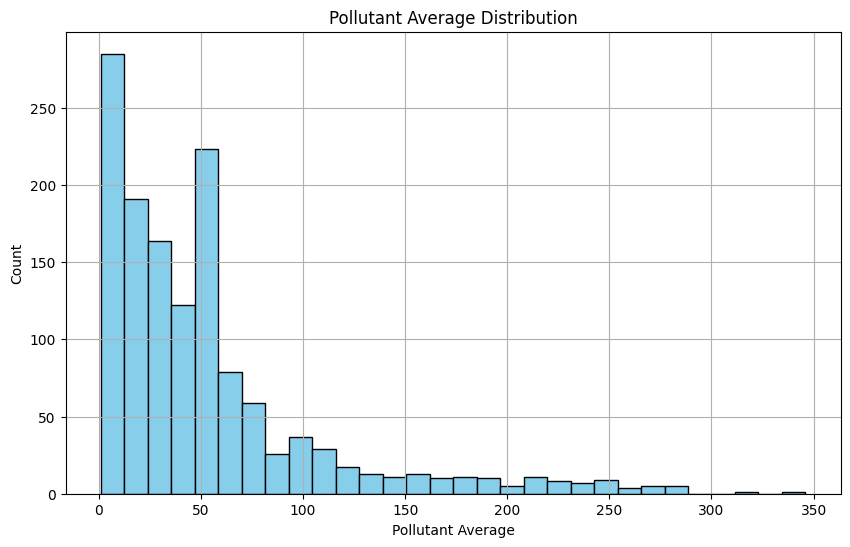

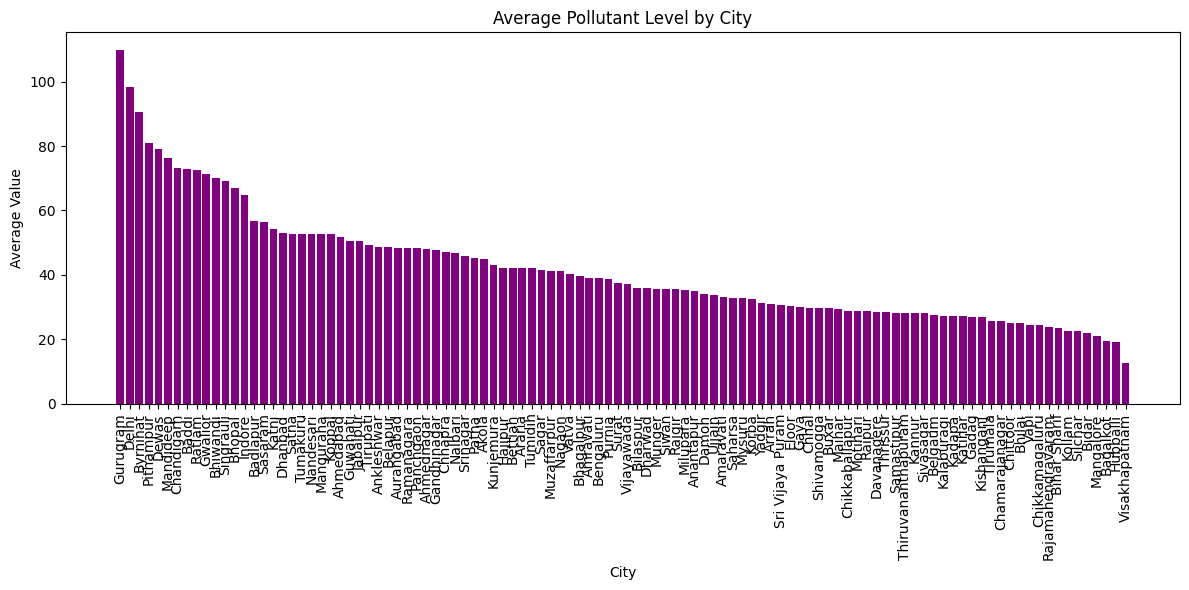

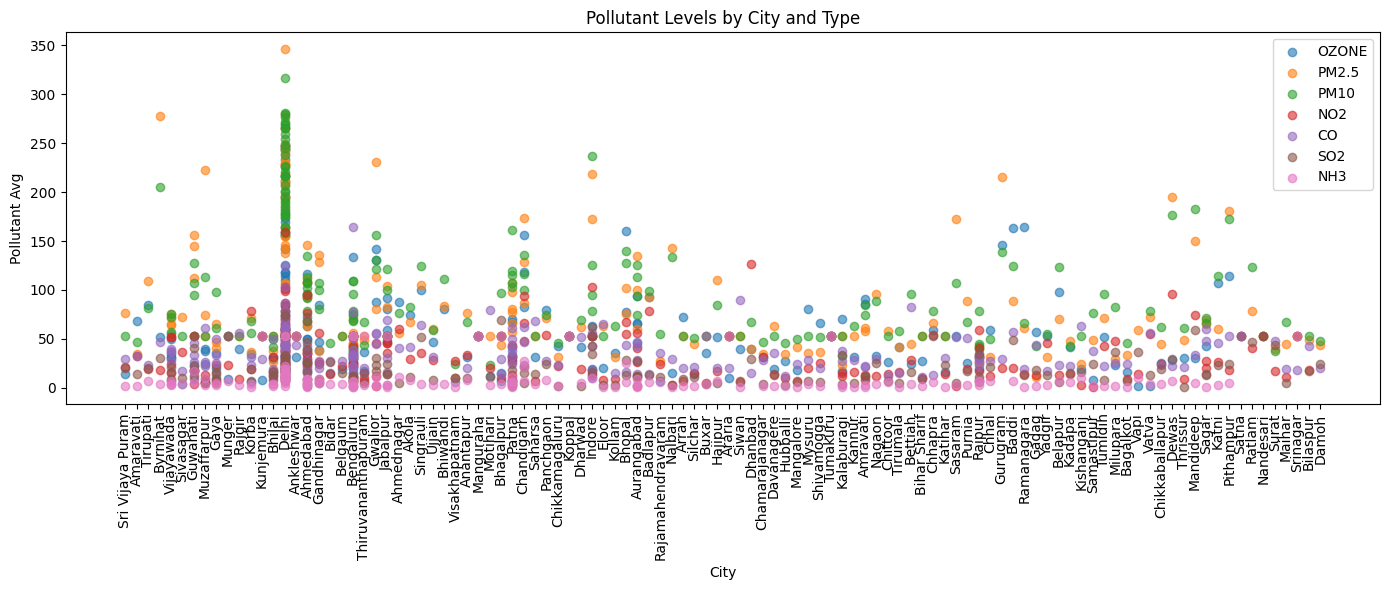

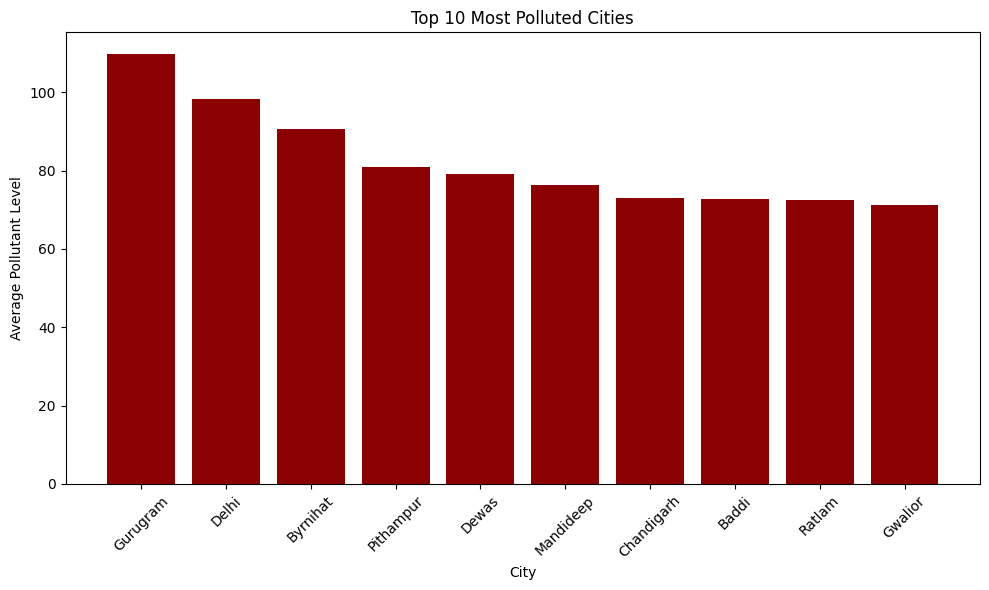

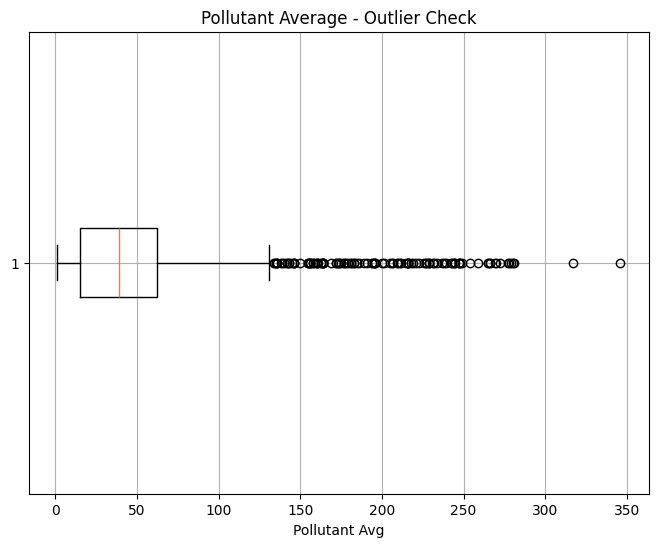

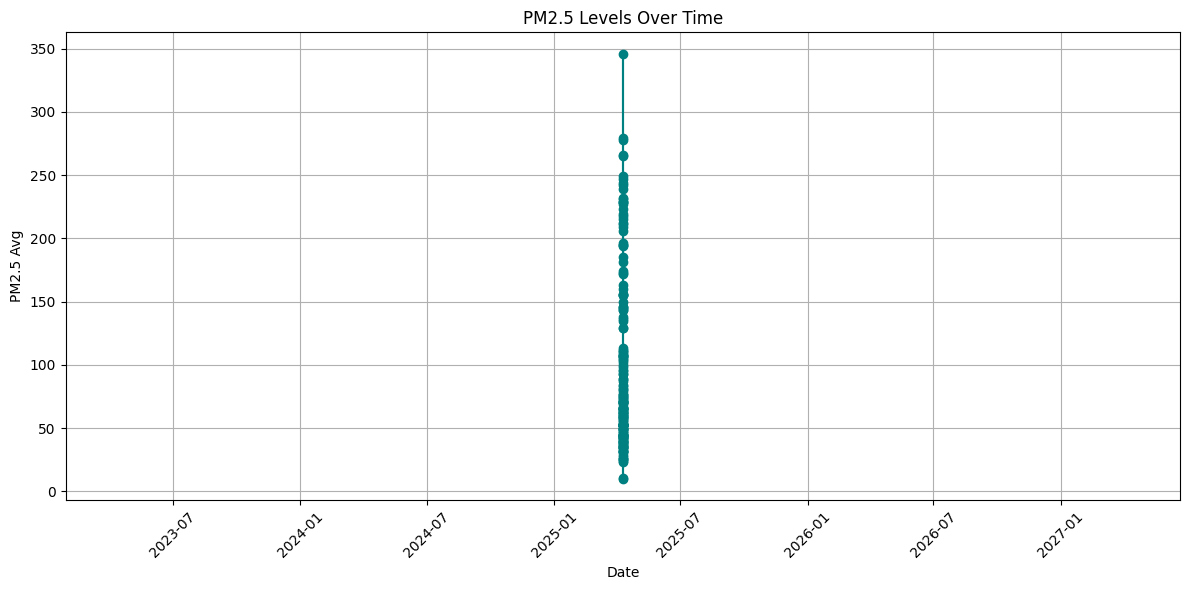

In [ ]:


# 1. Histogram - Pollutant Average
plt.figure(figsize=(10, 6))
plt.hist(data['pollutant_avg'], bins=30, color='skyblue', edgecolor='black')
plt.title('Pollutant Average Distribution')
plt.xlabel('Pollutant Average')
plt.ylabel('Count')
plt.grid(True)
plt.show()


# 2. Bar Chart - Average Pollutant Level by City
city_avg = data.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(city_avg.index, city_avg.values, color='purple')
plt.xticks(rotation=90)
plt.title('Average Pollutant Level by City')
plt.xlabel('City')
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()


# 3. Scatter Plot - Pollutant Level by City and Type
plt.figure(figsize=(14, 6))
colors = {'PM2.5':'red', 'PM10':'blue', 'NO2':'green', 'SO2':'orange'}  # Add more if needed
for pollutant in data['pollutant_id'].unique():
    group = data[data['pollutant_id'] == pollutant]
    plt.scatter(group['city'], group['pollutant_avg'], label=pollutant, alpha=0.6)

plt.xticks(rotation=90)
plt.title('Pollutant Levels by City and Type')
plt.xlabel('City')
plt.ylabel('Pollutant Avg')
plt.legend()
plt.tight_layout()
plt.show()


# 4. Bar Chart - Top 10 Most Polluted Cities
top_10 = city_avg.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10.values, color='darkred')
plt.title('Top 10 Most Polluted Cities')
plt.xlabel('City')
plt.ylabel('Average Pollutant Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Box Plot - Outlier Detection
plt.figure(figsize=(8, 6))
plt.boxplot(data['pollutant_avg'], vert=False)
plt.title('Pollutant Average - Outlier Check')
plt.xlabel('Pollutant Avg')
plt.grid(True)
plt.show()


# 6. Line Chart - PM2.5 Over Time
pm25 = data[data['pollutant_id'] == 'PM2.5']

plt.figure(figsize=(12, 6))
plt.plot(pm25['last_update'], pm25['pollutant_avg'], marker='o', color='teal')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Avg')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



Summary Statistics:
        pollutant_min  pollutant_max  pollutant_avg
count    1356.000000    1356.000000    1356.000000
mean       27.468137      89.714052      52.830065
std        33.078424      93.839881      55.256762
min         1.000000       1.000000       1.000000
25%         7.000000      23.000000      15.000000
50%        18.000000      66.000000      39.000000
75%        32.000000     107.000000      62.250000
max       251.000000     500.000000     346.000000

Correlation Matrix:
                pollutant_min  pollutant_max  pollutant_avg
pollutant_min       1.000000       0.717744       0.835298
pollutant_max       0.717744       1.000000       0.914464
pollutant_avg       0.835298       0.914464       1.000000


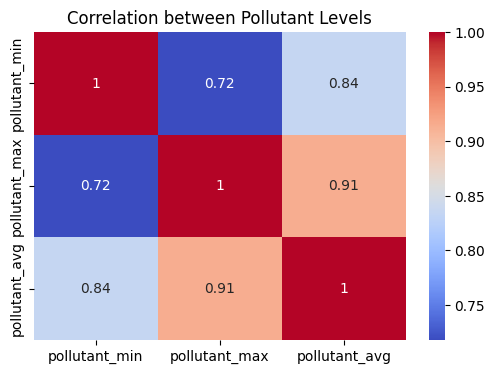

In [ ]:

print("\nSummary Statistics:\n", data[['pollutant_min', 'pollutant_max', 'pollutant_avg']].describe())

# Correlation matrix
corr = data[['pollutant_min', 'pollutant_max', 'pollutant_avg']].corr()
print("\nCorrelation Matrix:\n", corr)

# Heatmap of correlation
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Pollutant Levels')
plt.show()


📌 Outlier values based on 'pollutant_avg':

             city pollutant_id  pollutant_avg         last_update
11       Byrnihat         PM10          205.0 2025-04-09 20:00:00
34     Aurangabad        PM2.5          135.0 2025-04-09 20:00:00
42    Muzaffarpur        PM2.5          223.0 2025-04-09 20:00:00
76     Chandigarh        PM2.5          174.0 2025-04-09 20:00:00
88          Delhi         PM10          265.0 2025-04-09 20:00:00
...           ...          ...            ...                 ...
1249  Gandhinagar        PM2.5          136.0 2025-04-09 20:00:00
1264     Gurugram        PM2.5          215.0 2025-04-09 20:00:00
1265     Gurugram         PM10          139.0 2025-04-09 20:00:00
1319      Gwalior        PM2.5          231.0 2025-04-09 20:00:00
1328       Indore         PM10          237.0 2025-04-09 20:00:00

[118 rows x 4 columns]


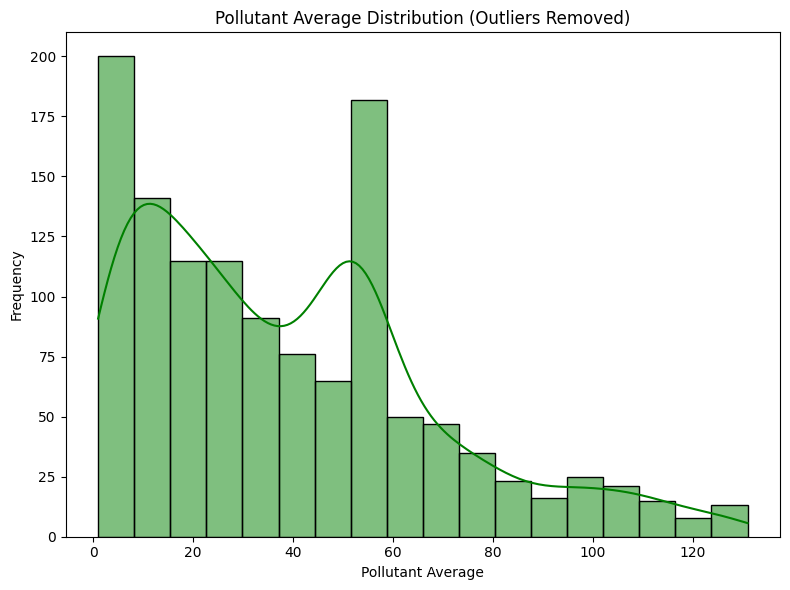

In [ ]:

# --------------------------
# 5. EDA - OUTLIER HANDLING
# --------------------------

# Calculate 25th and 75th percentile using NumPy
Q1 = np.percentile(data['pollutant_avg'], 25)
Q3 = np.percentile(data['pollutant_avg'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQRA

# Filter data to get outliers only
outliers = data[(data['pollutant_avg'] < lower_bound) | (data['pollutant_avg'] > upper_bound)]

# Show outlier values
print("\nOutlier values based on 'pollutant_avg':\n")
print(outliers[['city', 'pollutant_id', 'pollutant_avg', 'last_update']])

# Filter data to remove outliers
no_outliers = data[(data['pollutant_avg'] >= lower_bound) & (data['pollutant_avg'] <= upper_bound)]

# Plot histogram after removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(no_outliers['pollutant_avg'], kde=True, color='green')
plt.title('Pollutant Average Distribution (Outliers Removed)')
plt.xlabel('Pollutant Average')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
